In [1]:
import zipfile
import os
import pathlib
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Check the number of directories and images in our pizza_steak folder

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} Directories and {len(filenames)} images in "{dirpath}"')

There are 2 Directories and 0 images in "pizza_steak"
There are 2 Directories and 0 images in "pizza_steak\test"
There are 0 Directories and 250 images in "pizza_steak\test\pizza"
There are 0 Directories and 250 images in "pizza_steak\test\steak"
There are 2 Directories and 0 images in "pizza_steak\train"
There are 0 Directories and 750 images in "pizza_steak\train\pizza"
There are 0 Directories and 750 images in "pizza_steak\train\steak"


To Visualize our image, let's get the class names programmatically!

In [3]:
data_directory  = pathlib.Path('pizza_steak/train')

class_name = np.array(sorted([items.name for items in data_directory.glob('*')]))

print(class_name)

['pizza' 'steak']


### Code for visualization

After viewing the classes we have in our pizza_steak classification problem...

How about we create some function that will view random images and plot them with matplotlib

In [4]:
#Function for viewing random images

def visualize_random_images(target_directory, target_class):
    
    """
    Simply plots random images from 'pizza', or 'steak' class for visualizing and understanding the image
    
    """
    #Set Target Folder
    target_folder = target_directory + target_class
    
    #Set Random Image
    random_image = random.sample(os.listdir(target_folder), 1)
    
    #Plot Random Image
    
    image = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(image)
    plt.title(target_class)
    plt.axis('off')
    
    print(f"Image Shape: {image.shape}")
    
    return image

Image Shape: (512, 512, 3)


array([[[ 18,  16,   4],
        [ 21,  19,   7],
        [ 24,  22,  10],
        ...,
        [ 46,  41,  22],
        [ 44,  39,  20],
        [ 44,  39,  20]],

       [[ 18,  16,   4],
        [ 21,  19,   7],
        [ 24,  22,  10],
        ...,
        [ 40,  35,  16],
        [ 39,  34,  15],
        [ 38,  33,  14]],

       [[ 19,  15,   4],
        [ 22,  18,   7],
        [ 24,  20,   9],
        ...,
        [ 34,  29,  10],
        [ 33,  28,   9],
        [ 33,  28,   9]],

       ...,

       [[250, 249, 218],
        [250, 249, 218],
        [250, 249, 219],
        ...,
        [178, 172, 114],
        [177, 171, 113],
        [176, 170, 112]],

       [[251, 248, 217],
        [251, 248, 217],
        [249, 248, 217],
        ...,
        [178, 172, 114],
        [177, 171, 113],
        [176, 170, 112]],

       [[251, 248, 217],
        [251, 248, 217],
        [249, 248, 217],
        ...,
        [177, 171, 113],
        [176, 170, 112],
        [175, 169, 111]]

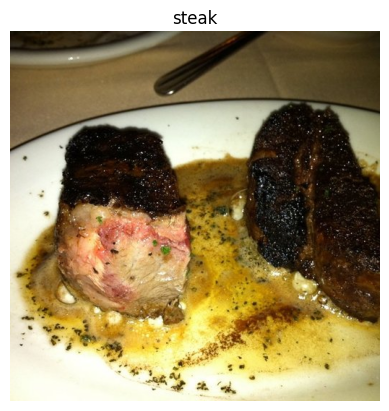

In [7]:
visualize_random_images(target_directory = 'pizza_steak/train/', target_class='steak')

### Note for self...

Now that we have covered a fair percentage of CNNs, it is better to view the model building process or general architecture
as the following

1. Get your data (could be an image, video, GIF) and group them into training, validation and testing sets, grouped into
a folder, with each set containing the grouped classes of images.

2. Import it to your workspace (whether jupyter notebook or Colab)

3. Create some function that visualizes random sets of the classes to get familiar with the data.

4. Set paths for train, validation and test datasets.

5. Create data generators using the `ImageDataGenerator` class from `tf.keras.preprocession.image`.
This process also involves normailizing the datasets by settin the rescale parameter (for images, we set the parameter to 1/255.)

6. Import data from directories using `flow_from_directory` method and turn them into batches. This sets up the train, validation and test datasets. Some parameters to pass are directory, batch_size, target_size (which is the size you want to reshape the large image to), class_mode (whether binary or categorical) and seed (for reproducibility)

7. Create the model. Set the filters, kernel_size, stride, padding, activation and input_shape for the Conv layer
and set pool_size, padding....for the MaxPool layer.

8. Compile the model. Set the loss function, optimizers and evaluation metrics.

9. fit the model. In fitting, specify the train_data, epochs, steps_per_epoch, validation_data, validation_steps.

In [8]:
def view_random_sample(targ_dir, targ_class):
    
    
    """
    Takes path of a random image, reads the image, and plots the image.
    
    """
    #Set target path
    targ_fold = targ_dir + targ_class
    
    #Get random image from 
    random_img = random.sample(os.listdir(targ_fold), 1)
    
    print(random_img)
    
    #Read random image and set it to img
    img = mpimg.imread(targ_fold + '/' + random_img[0])
    print(f"Shape: {img.shape}")
    
    
    
    #Plot the image
    plt.imshow(img)
    plt.title(targ_class)
    plt.axis(False)
    
    #return img

['2705497.jpg']
Shape: (512, 512, 3)
['140832.jpg']
Shape: (512, 382, 3)


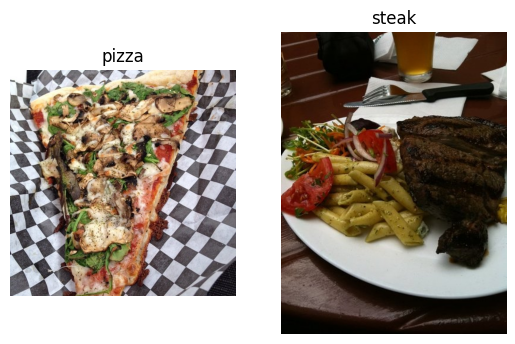

In [29]:
# Plot a some samples to get familiar with the data

plt.figure()

plt.subplot(1,2,1)
pizza = view_random_sample(targ_dir='pizza_steak/train/', targ_class='pizza')

plt.subplot(1,2,2)
steak = view_random_sample(targ_dir='pizza_steak/train/', targ_class='steak')

In [30]:
for dirpaths, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} in the {dirpaths} folder')

There are 2 directories and 0 in the pizza_steak folder
There are 2 directories and 0 in the pizza_steak\test folder
There are 0 directories and 250 in the pizza_steak\test\pizza folder
There are 0 directories and 250 in the pizza_steak\test\steak folder
There are 2 directories and 0 in the pizza_steak\train folder
There are 0 directories and 750 in the pizza_steak\train\pizza folder
There are 0 directories and 750 in the pizza_steak\train\steak folder


Now we ready to preprocess data and to build our CNN model

In [42]:
#Set Random Seed
tf.random.set_seed(42)

# Set path for train and test data
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

#Create Image Data Generator for train and test data
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

#Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

# Create the Model

cnn_model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=20, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])


#Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

#fit the model

history_2 = cnn_model.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 88s 2s/step - loss: 0.6116 - accuracy: 0.6580 - val_loss: 0.4497 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 100s 2s/step - loss: 0.4407 - accuracy: 0.7973 - val_loss: 0.3369 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 97s 2s/step - loss: 0.3924 - accuracy: 0.8327 - val_loss: 0.3727 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 106s 2s/step - loss: 0.3659 - accuracy: 0.8393 - val_loss: 0.3008 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 104s 2s/step - loss: 0.3146 - accuracy: 0.8827 - val_loss: 0.3109 - val_accuracy: 0.8680


In [43]:
def plot_train_curve(history):

    """
    This function simply plots the accuracy and val_accuracy and one figure as well as
    the loss and val_loss on a separate figure for clear visualization
  
    """

    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs = range(len(history.history['loss']))


    #Plot the losses
    plt.figure()
    plt.plot(epochs, loss, label='Loss')
    plt.plot(epochs, val_loss, label='Val_loss')
    plt.title("Losses")
    plt.xlabel("Epochs")
    plt.legend()

    #Plot Accuracies
    plt.figure()
    plt.plot(epochs, acc, label='Accuracy')
    plt.plot(epochs, val_acc, label='Val_accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()



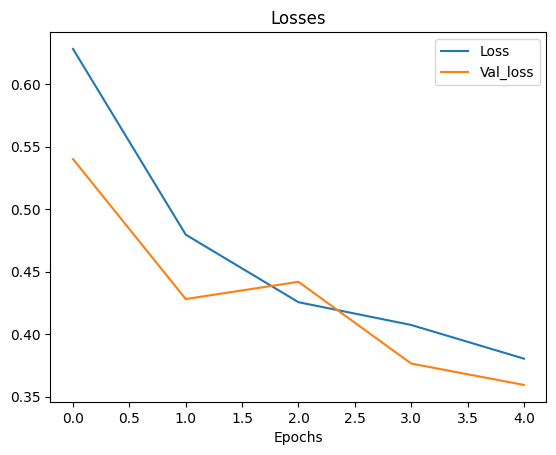

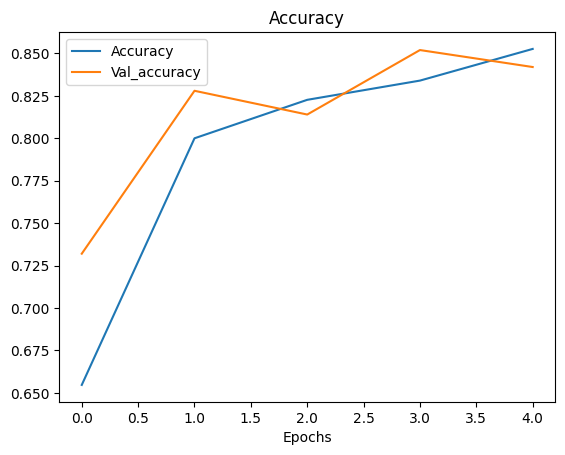

In [33]:
plot_train_curve(history_2)

## Note To Self

Oh my gosh! I think we've found it. The Image data generation of the training data doesn't really matter in the accuracy of the model.


What we could do, is add a few conv2D layers and Maxpool layers, increase the kernel_size and strides!

**Let's learn how to predict on a custom image using our money**

Afterall, what good is the model if we can't use it to predict on real life images.



(-0.5, 3023.5, 4031.5, -0.5)

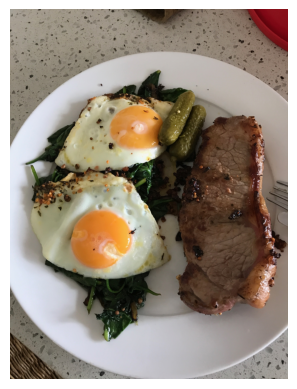

In [18]:
steak = mpimg.imread('03-steak.jpeg')

plt.imshow(steak)
plt.axis(False)

In [20]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 20)      560       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 20)      3620      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 20)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 20)      3620      
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 20)      3620      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 20)       0         
 2D)                                                  

In [51]:
def load_and_process_custom_image(file, im_shape=224):
    
    """
    Function reads our custom image we want to predict, turns it to a tensor,
    resizes the image to be compatible with the training images and normalizing it
    
    """
    
    #Read in the custom image to predict
    img = tf.io.read_file(file)
    
    #Convert custom image to a tensor
    img = tf.image.decode_image(img)
    
    #resize the custom image
    img = tf.image.resize(img, size = [im_shape, im_shape])
    
    #Normalize the custom image
    img = img/255.
    
    
    return img

1/1 [==============================] - 0s 31ms/step


Let's now write some fuction that predicts on the custom image and plots it with its class label.

In [52]:
def predict_and_plot(model, filename, class_label = class_name):
    
    #Load the image to predict
    
    img = load_and_process_custom_image(filename)
    
    #Make prediction on the image
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Round the prediction probability and Index it on the class label
    pred_class = class_name[int(tf.round(pred))]
    
    #Plot the image
    
    plt.imshow(img)
    
    plt.title(f"Prediction : {pred_class}")
    
    plt.axis('off');
    

1/1 [==============================] - 0s 31ms/step


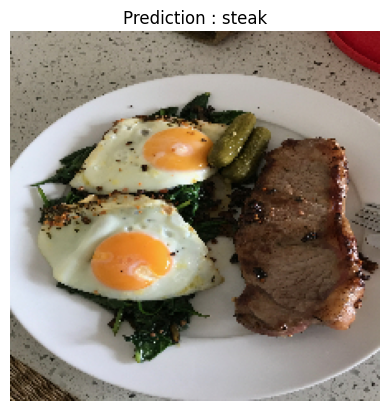

In [53]:
predict_and_plot(cnn_model, '03-steak.jpeg')